# Trabajo práctico 1: Método potencia.
## Alumnos:
- Juan Pablo Daus Meier
- Vladimir Kannemann

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Punto 1
def metodoPotencia(A,k):
    autoValores=np.zeros(k)
    v=np.random.rand(A.shape[0]) #creamos un vector random de longitud k.
    for i in range(k):
        v=(A@v)/np.linalg.norm(A@v) #calculamos A^i*v
        autoValores[i]= (v.T@A@v)/(v.T@v) #guardo cada autovalor de cada autovector
    return autoValores

In [3]:
mat=np.array([[-2,0,0],[0,-5,6],[0,-3,4]])
calculado=metodoPotencia(mat,100)[-1]
exacto=np.linalg.eigvals(mat)[-1]
print(calculado==exacto)

True


In [4]:
def crearMatrices(n):
    matrizRandom=np.random.rand(n,n)
    A=matrizRandom
    B=np.triu(A)+np.triu(A).T
    C=B + 100*np.eye(n)
    D=B + 1000*np.eye(n)
    
    return A,B,C,D

In [5]:
matrices=crearMatrices(100)
print(matrices)

(array([[0.95986343, 0.87390759, 0.39498365, ..., 0.05395547, 0.9855585 ,
        0.66258278],
       [0.35204661, 0.74047474, 0.40900652, ..., 0.27654206, 0.25752851,
        0.35843094],
       [0.74688754, 0.22546536, 0.89813404, ..., 0.89242358, 0.30343237,
        0.79322767],
       ...,
       [0.82550417, 0.02127876, 0.43570034, ..., 0.09419813, 0.97000818,
        0.08317611],
       [0.72398459, 0.17332532, 0.08980987, ..., 0.33687074, 0.58920805,
        0.55591271],
       [0.93092498, 0.49480052, 0.12393276, ..., 0.40055805, 0.94364349,
        0.60421131]]), array([[1.91972685, 0.87390759, 0.39498365, ..., 0.05395547, 0.9855585 ,
        0.66258278],
       [0.87390759, 1.48094948, 0.40900652, ..., 0.27654206, 0.25752851,
        0.35843094],
       [0.39498365, 0.40900652, 1.79626808, ..., 0.89242358, 0.30343237,
        0.79322767],
       ...,
       [0.05395547, 0.27654206, 0.89242358, ..., 0.18839626, 0.97000818,
        0.08317611],
       [0.9855585 , 0.25752851, 0

In [6]:
def evaluarMatriz(m):
    vec = np.zeros(100) ##vector lleno de ceros, para almacenar el autovalor en cada paso del metodo de la potencia
    met=metodoPotencia(m,100)
    return met

Text(0.5, 0.98, 'Autovalores')

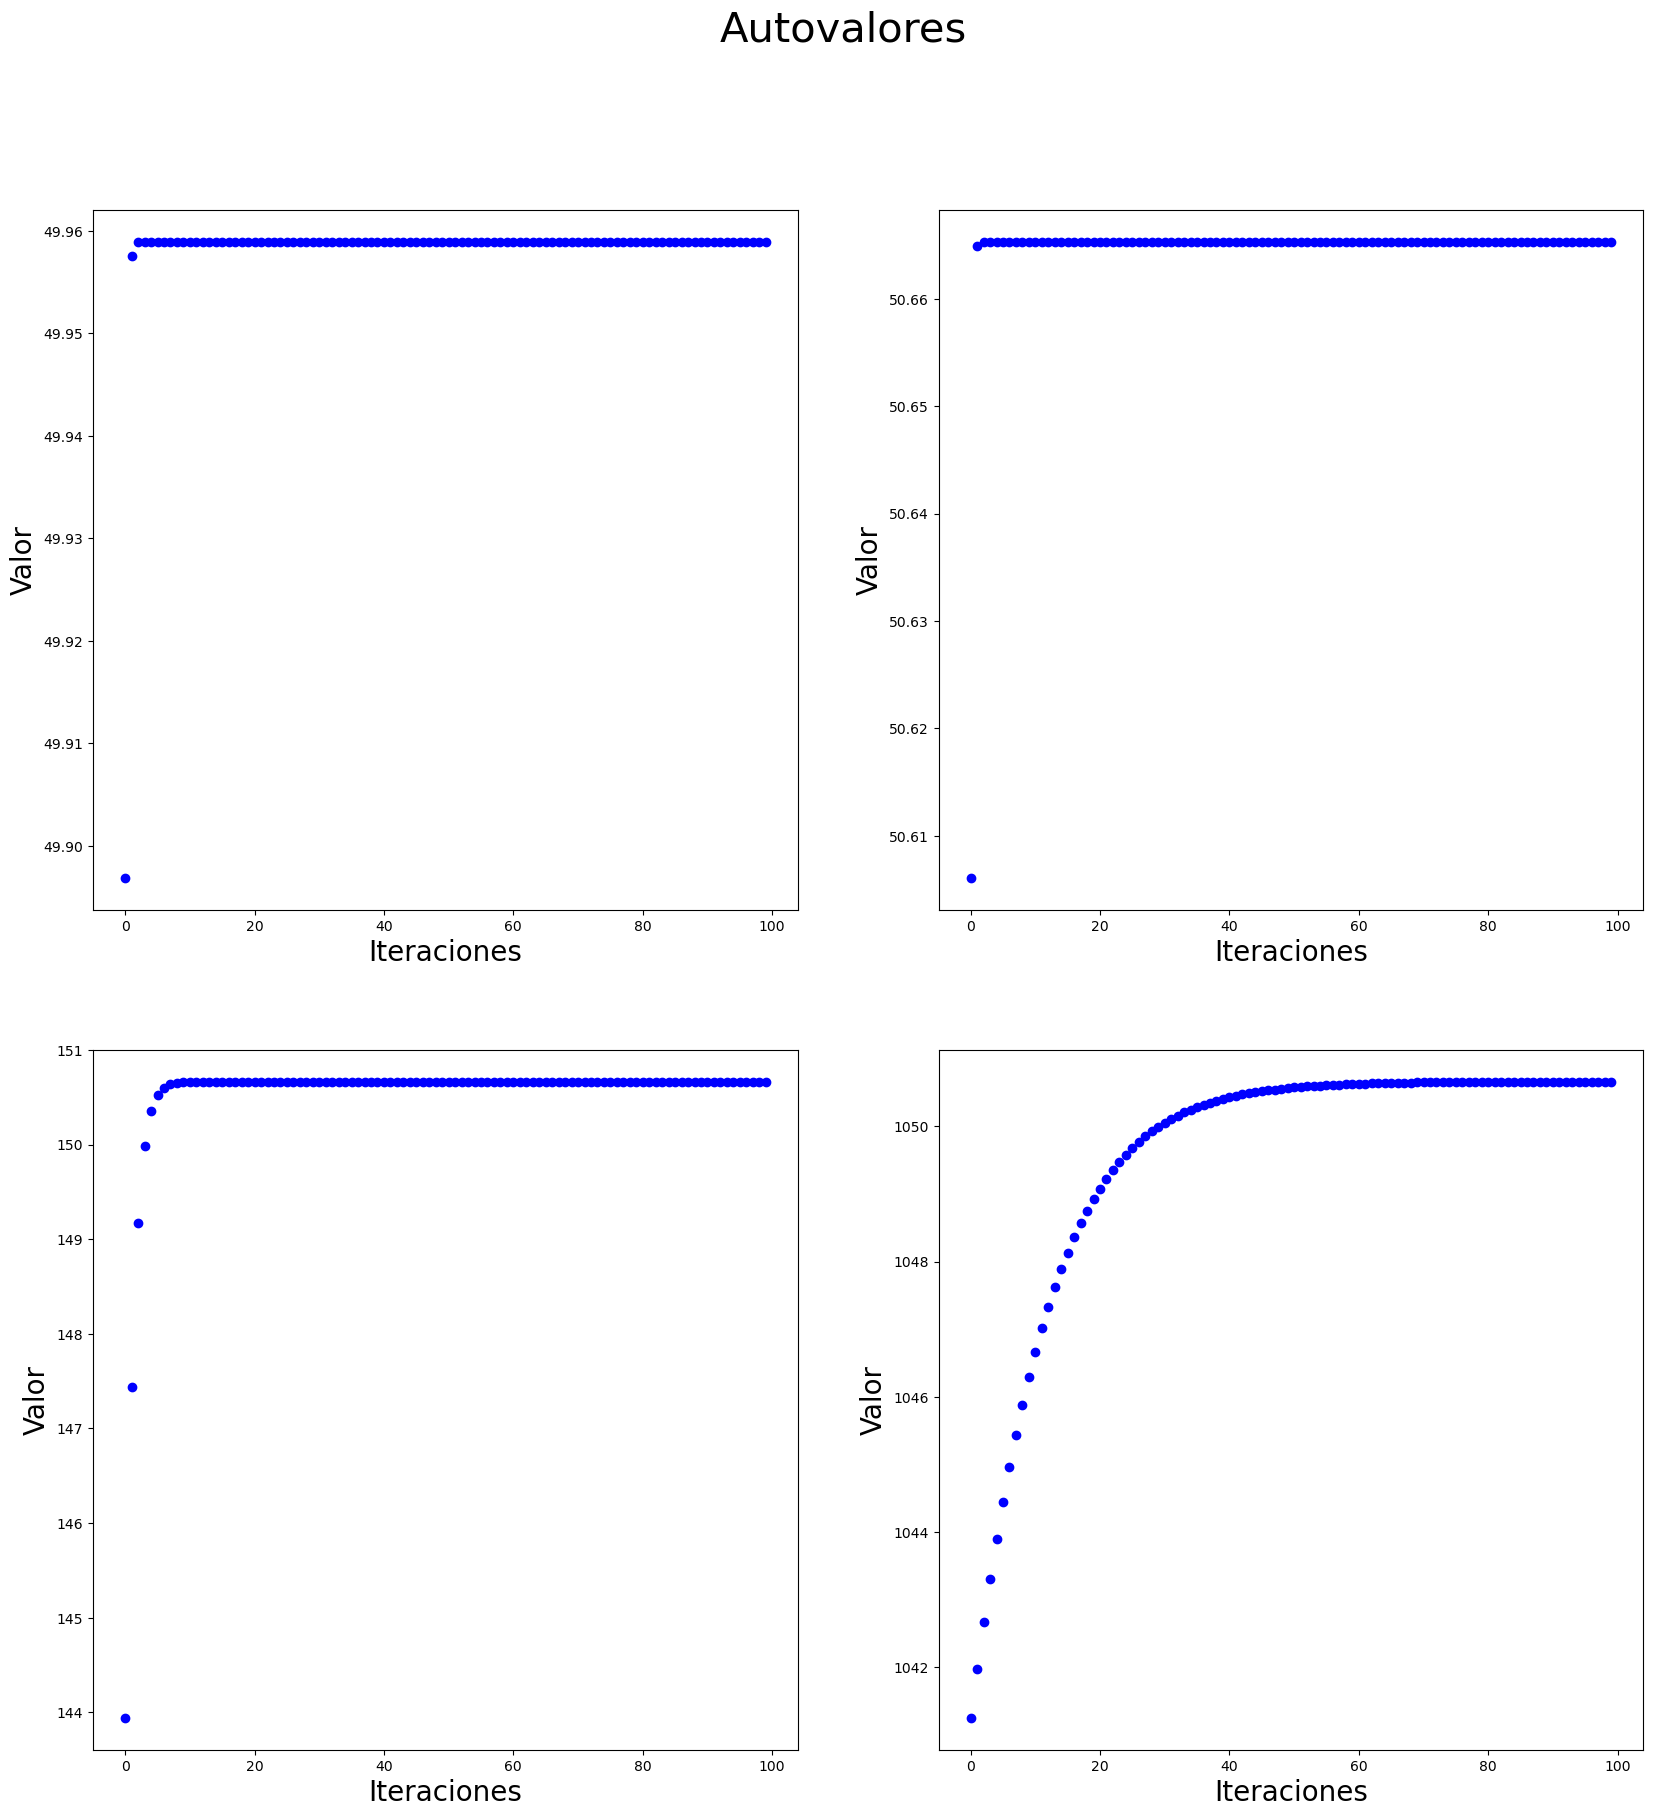

In [7]:
def graficar1(ax,rango,e,x,y):
    ax.scatter(range(rango),e,color="blue")
    ax.set_xlabel(x,fontsize=20)
    ax.set_ylabel(y,fontsize=20)
    return ax

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
graficar1(ax[0,0],100,evaluarMatriz(matrices[0]),"Iteraciones","Valor")
graficar1(ax[0,1],100,evaluarMatriz(matrices[1]),"Iteraciones","Valor")
graficar1(ax[1,0],100,evaluarMatriz(matrices[2]),"Iteraciones","Valor")
graficar1(ax[1,1],100,evaluarMatriz(matrices[3]),"Iteraciones","Valor")
fig.suptitle("Autovalores",fontsize=30)

**B)** Se puede observar que aplicando el método tanto para la matriz A como para la matriz B este no difiere mucho. Ya observando el gráfico de la matriz C se puede ver una gran diferencia a las anteriores y las última es la que posee una mayor diferencia. 

**C)** Consideramos que el método converge rápidamente para las primeras dos matrices y para las otras dos se puede ver que ya empieza a tardarse más en converger, por lo que para matrices con números más cercanos al 0 converge rápidamente y para matrices con números más lejanos al 0 converge más lentamente. 


Agregado:

- Se puede observar que los autovalores tienen sentido, y más aún si nos fijamos en las matrices B, C y D, donde son los mismos pero con sumas de tantas veces 1. Esto se debe a que existe una propiedad la cual nos dice que los autovalores de la matriz B+XI son los autovalores de B pero sumándole X veces 1, o sea si L es un autovalor de B entonces L+100 es autovalor de C (B+100Id) y lo mismo para L+1000 es autovalor de D (B+1000Id). Por lo tanto si las matrices en la diagonal poseen valores mucho más grandes y los autovalores son más grandes entonces el método tarda en converger.  
- Mientras la traza de una matriz sea significativamente mayor al resto de esta el método de la potencia tarda en converger. Por lo tanto, traza más grande -> más pasos para llegar a converger. 

**Punto 3a:**

In [8]:
def error(m):
    vals=sorted(np.abs(np.linalg.eigvals(m)))#para tener los valores exactos, dados por python.
    lambda_1=vals[-1] 
    lambda_2=vals[-2]
    met=metodoPotencia(m,100)#aplicamos metodo de la potencia a la matriz.
    e=np.zeros(100)#creamos vector lleno de zeros para los errores.
    e_exacto=np.zeros(100)
    for i in range(100):
        e[i]= np.log(np.abs(lambda_1-met[i]))
    return e

/tmp/ipykernel_158186/1915361054.py:9: RuntimeWarning: divide by zero encountered in log
  e[i]= np.log(np.abs(lambda_1-met[i]))


Text(0.5, 0.98, 'Aproximación de errores')

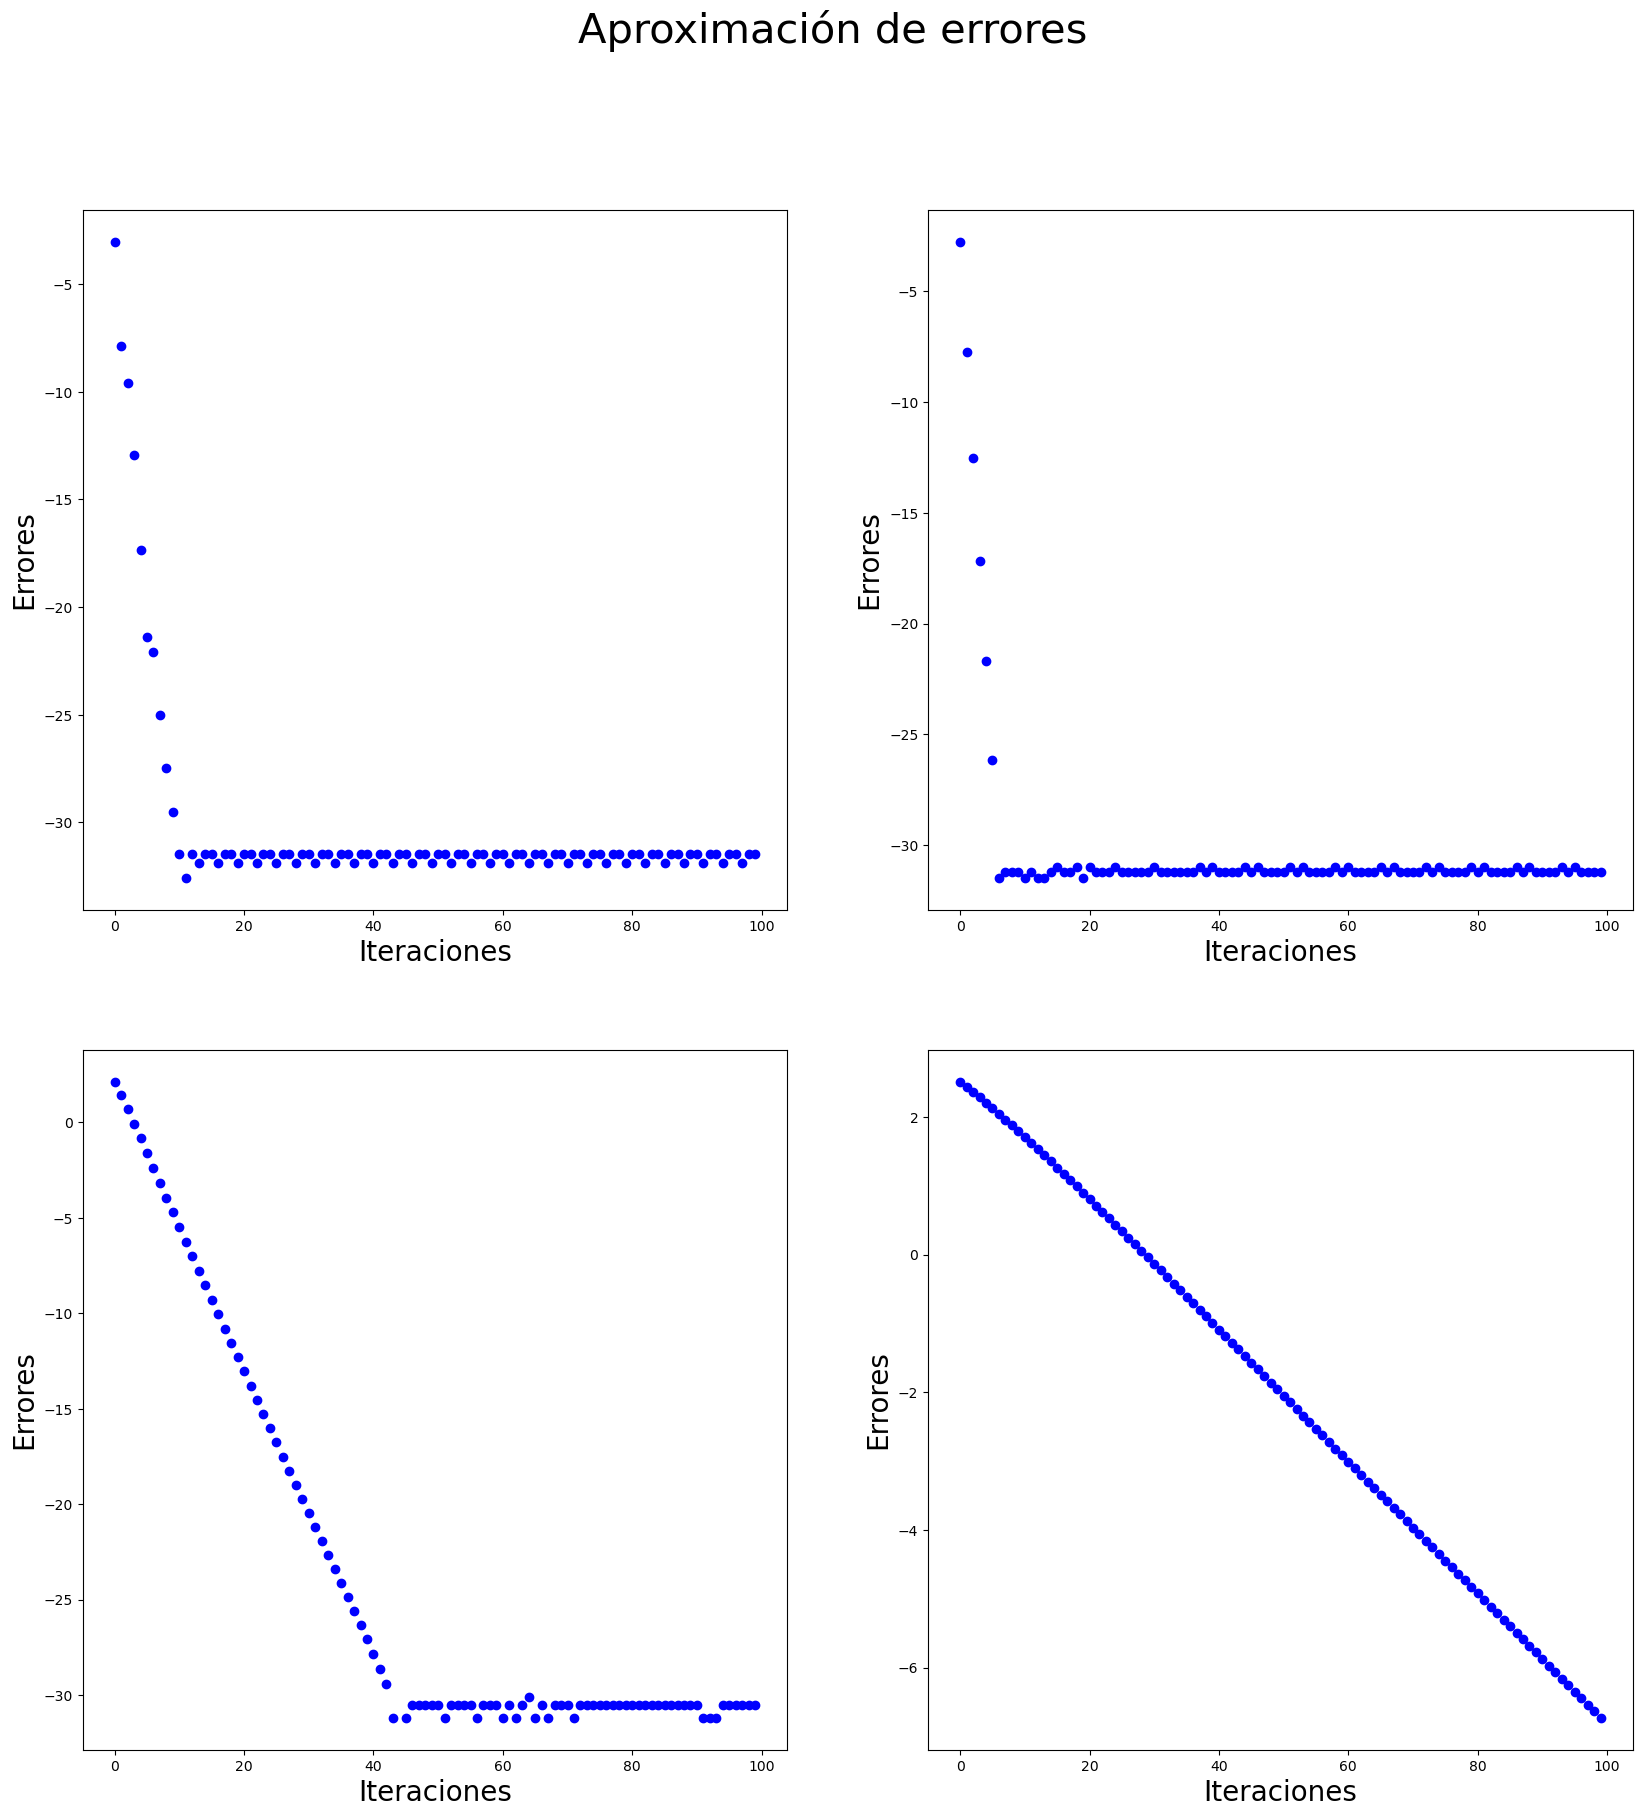

In [9]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
graficar1(ax[0,0],100,error(matrices[0]),"Iteraciones","Errores")
graficar1(ax[0,1],100,error(matrices[1]),"Iteraciones","Errores")
graficar1(ax[1,0],100,error(matrices[2]),"Iteraciones","Errores")
graficar1(ax[1,1],100,error(matrices[3]),"Iteraciones","Errores")
fig.suptitle("Aproximación de errores",fontsize=30)

**Punto 3b:**

In [15]:
def error_pendiente(m):
    vals=sorted(np.abs(np.linalg.eigvals(m)))#para tener los valores exactos, dados por python.
    lambda_1=vals[-1] 
    lambda_2=vals[-2]
    met=metodoPotencia(m,100)#aplicamos metodo de la potencia a la matriz.
    e=error(m)
    e_exacto=np.zeros(100)
    for i in range(100):
        e_exacto[i]= 2*np.log(lambda_2/lambda_1)*i+e[0]
    return(e,e_exacto)

Text(0.5, 0.98, 'Aproximación de errores contra funcion Y(x)')

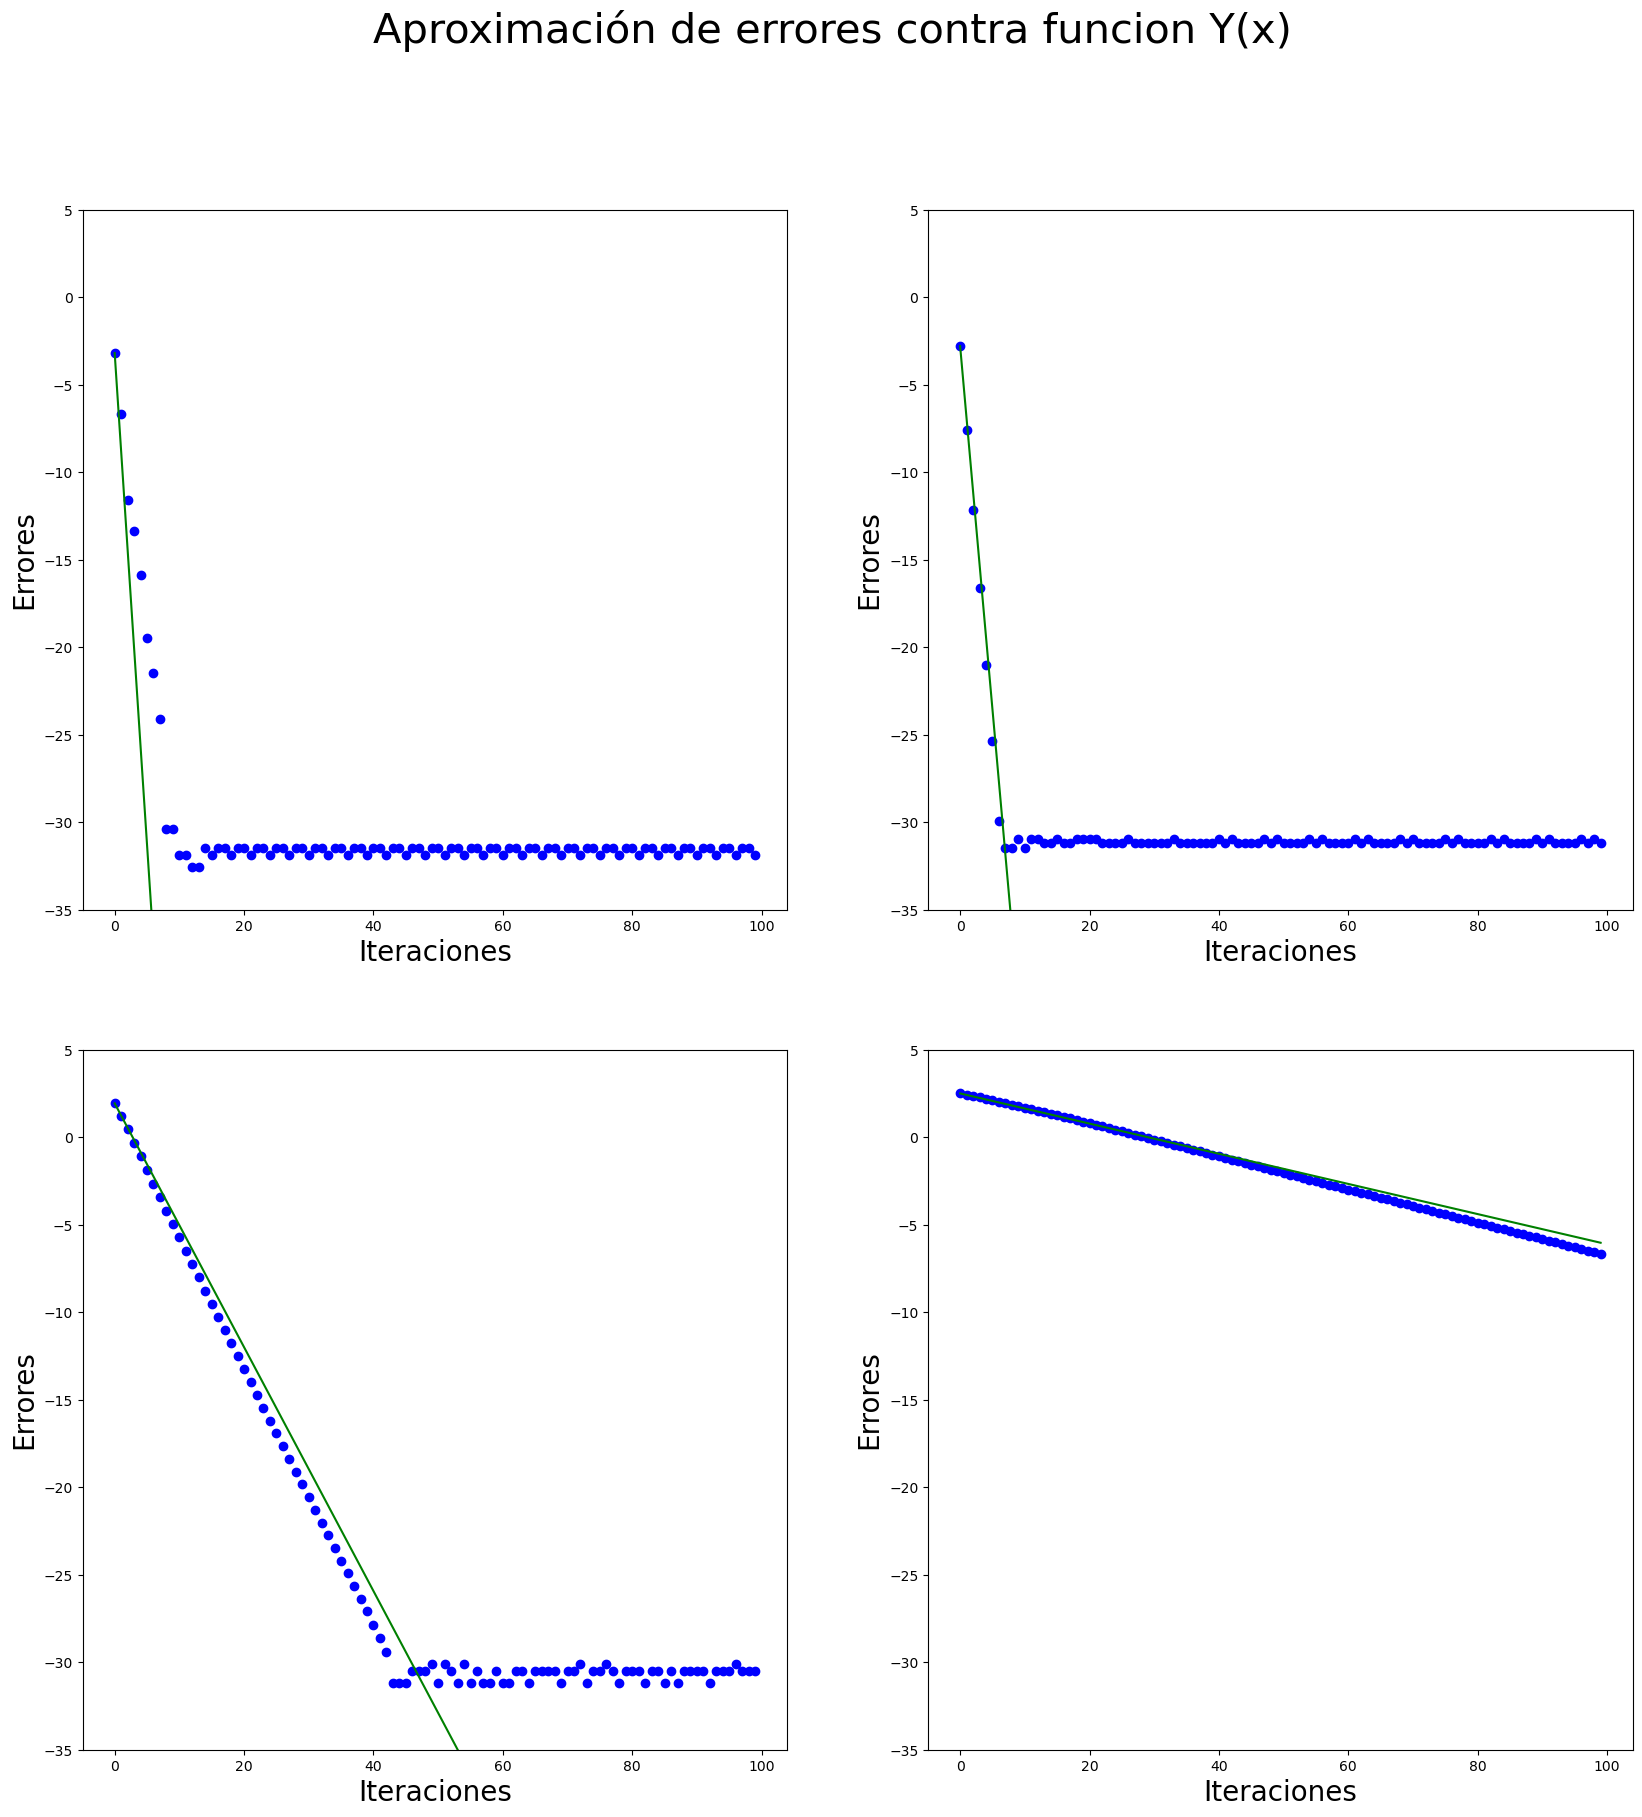

In [18]:
def graficar2(ax,rango,error,xlabel,ylabel):
    ax.scatter(range(rango),error[0], color="blue")
    ax.plot(range(rango),error[1],color="green")
    ax.set_xlabel(xlabel,fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_ylim([-35,5])
    return ax
    
fig,ax1=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
graficar2(ax1[0,0],100,error_pendiente(matrices[0]),"Iteraciones","Errores")
graficar2(ax1[0,1],100,error_pendiente(matrices[1]),"Iteraciones","Errores")
graficar2(ax1[1,0],100,error_pendiente(matrices[2]),"Iteraciones","Errores")
graficar2(ax1[1,1],100,error_pendiente(matrices[3]),"Iteraciones","Errores")
fig.suptitle("Aproximación de errores contra funcion Y(x)",fontsize=30)


**Punto 3c:**
Lo que se puede observar es que a medida que la diferencia entre los autovalores es más chica la pendiente es más grande por lo que el error tarda más en converger a 0. Y si la diferencia es más grande, la pendiente es más chica por lo que el error tarda menos en converger a 0. Todo esto viéndolo en las escalas de los gráficos que proponen pendientes negativas. Un claro ejemplo es la matriz A contra la matriz D.

Algunas observaciones que se pueden hacer sobre las pendientes son:
- menor valor absoluto de la pendiente-> la recta es más horizontal-> convergencia más lenta al 0.
- mayor valor absoluto de la pendiente -> la recta más vertical-> converegencia más rapida al 0.
- converge rapidamente -> propagación del error es más chica.
- converge lentamente -> propagación del error es más grande.
